<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_using_rutures_in_Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

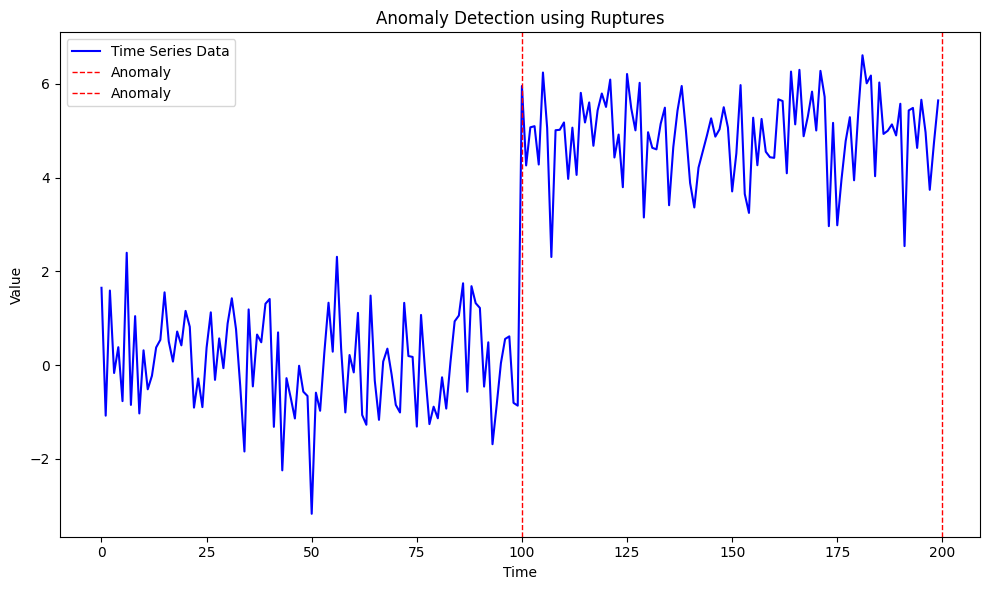

In [3]:
!pip install Ruptures
import numpy as np
import matplotlib.pyplot as plt
from ruptures.detection import Pelt

# Define a custom cost function for anomaly detection
def custom_cost(cpt, data):
    mean_before = np.mean(data[:cpt])
    mean_after = np.mean(data[cpt:])
    return (mean_after - mean_before)**2

# Generate synthetic time series data with an anomaly
n_samples = 200
data = np.concatenate([np.random.normal(loc=0, scale=1, size=100),
                       np.random.normal(loc=5, scale=1, size=100)])

# Apply change point detection for anomaly detection
model = Pelt(model="rbf").fit(data)
result = model.predict(pen=10)  # Use a specific penalty value here

# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(data, color='blue', label='Time Series Data')

for bkpt in result:
    plt.axvline(x=bkpt, color='red', linestyle='--', linewidth=1, label='Anomaly')

plt.title("Anomaly Detection using Ruptures")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

